<a href="https://colab.research.google.com/github/cvvarun12/Data-analytics-with-python/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAD** **AND** **EXPLORE** **THE** **DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving Copy of superstoreSales.xlsx to Copy of superstoreSales.xlsx


In [ ]:
# Read the dataset
df = pd.read_excel('Copy of superstoreSales.xlsx')

# Display basic info
print(df.info())

# Display first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

# **DATA** **CLEANING**

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Fill missing values in "Product Base Margin" with the mean
df["Product Base Margin"].fillna(df["Product Base Margin"].mean(), inplace=True)

# Convert "Order Date" and "Ship Date" to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Verify changes
print(df.info())

<ipython-input-3-e0e270c41b5a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Product Base Margin"].fillna(df["Product Base Margin"].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

# **EDA** **AND** **VISUALISATIONS**

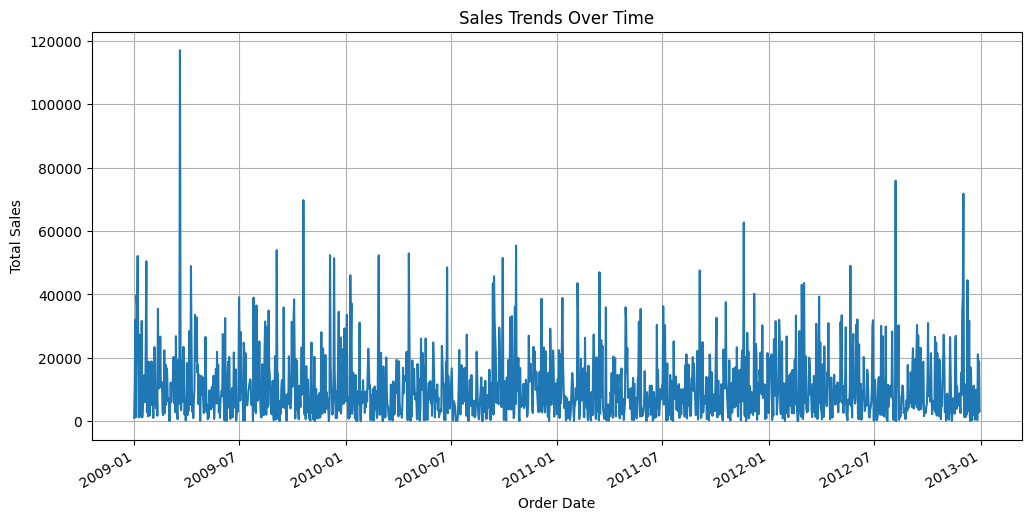

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby("Order Date")["Sales"].sum().plot()
plt.title("Sales Trends Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

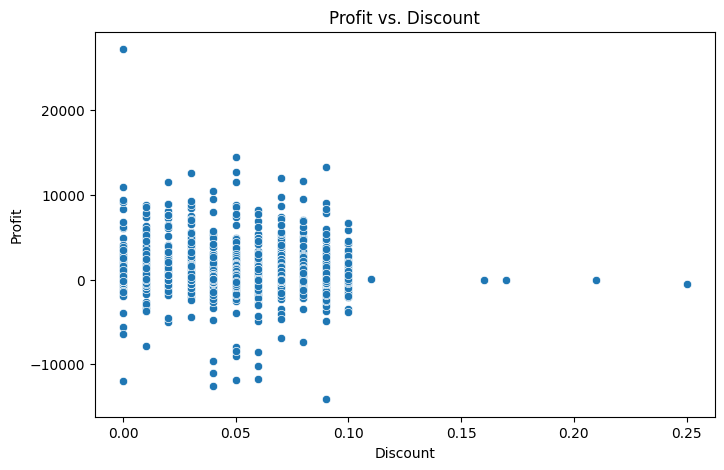

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Discount"], y=df["Profit"])
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

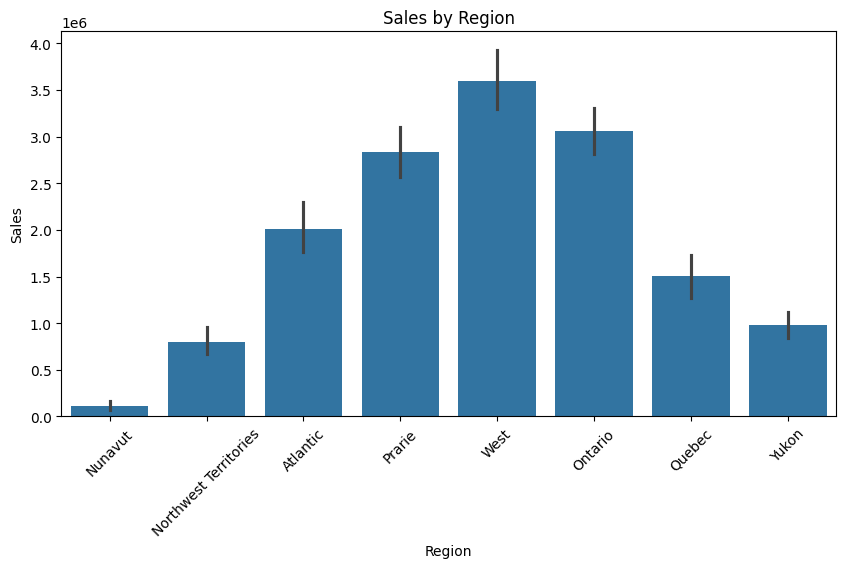

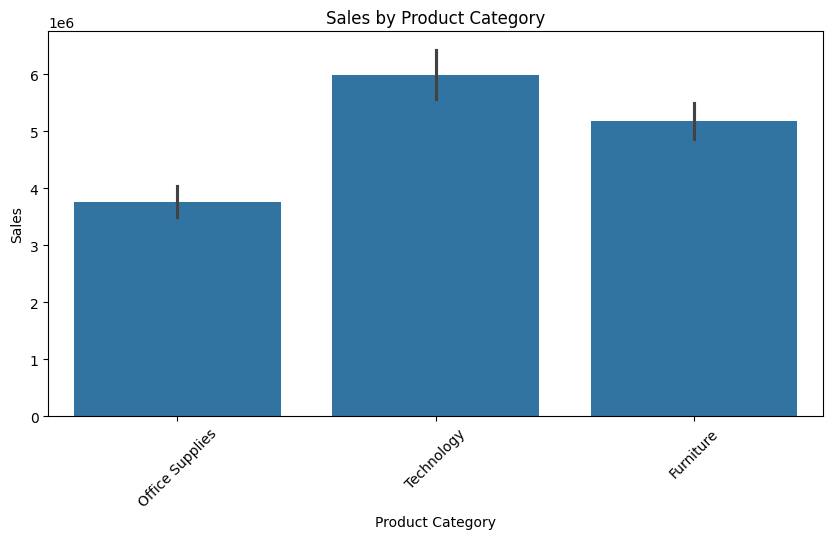

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Sales by Region")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Product Category", y="Sales", data=df, estimator=sum)
plt.title("Sales by Product Category")
plt.xticks(rotation=45)
plt.show()

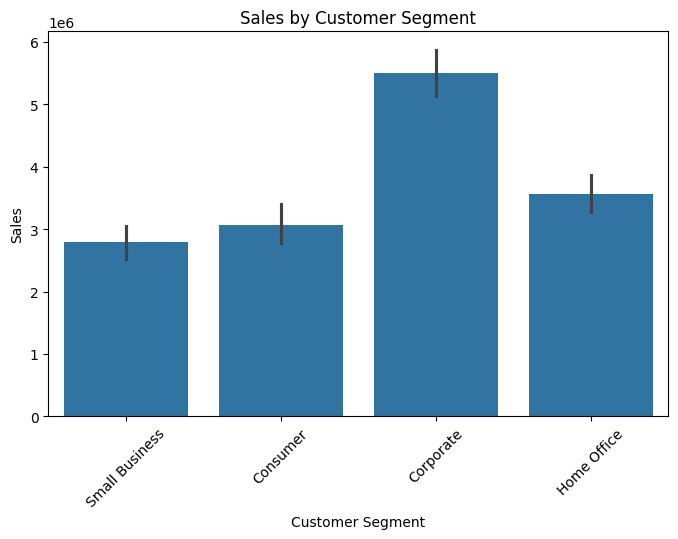

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Customer Segment", y="Sales", data=df, estimator=sum)
plt.title("Sales by Customer Segment")
plt.xticks(rotation=45)
plt.show()

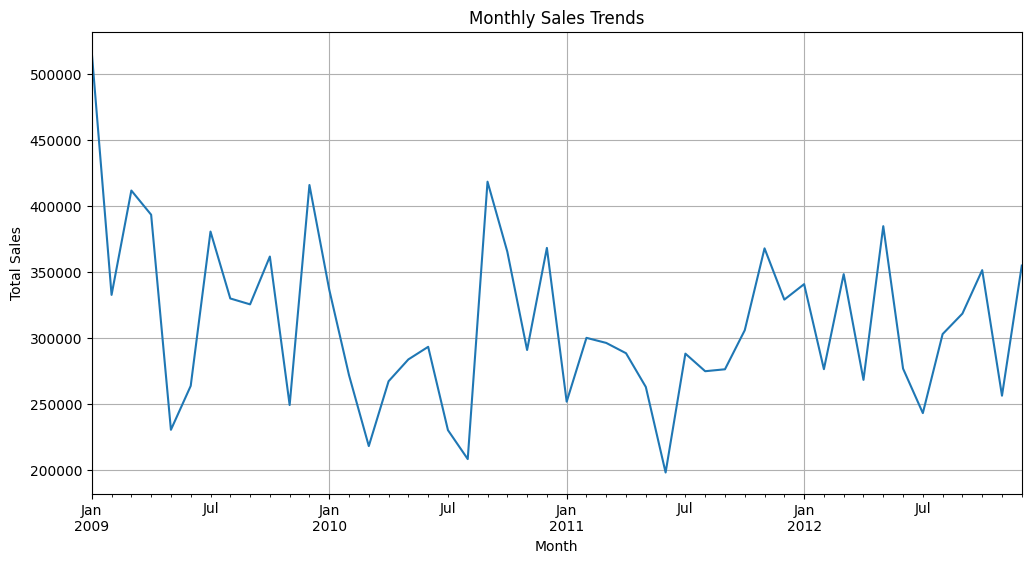

In [ ]:
df["Month"] = df["Order Date"].dt.to_period("M")
plt.figure(figsize=(12, 6))
df.groupby("Month")["Sales"].sum().plot()
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [ ]:
# Select relevant columns
features = df[["Profit", "Discount"]]
target = df["Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 7955394.115766786
R² Score: 0.1482794120308537


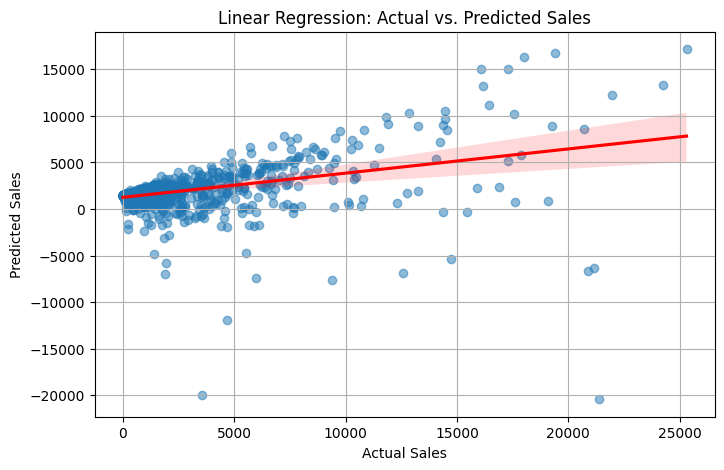

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

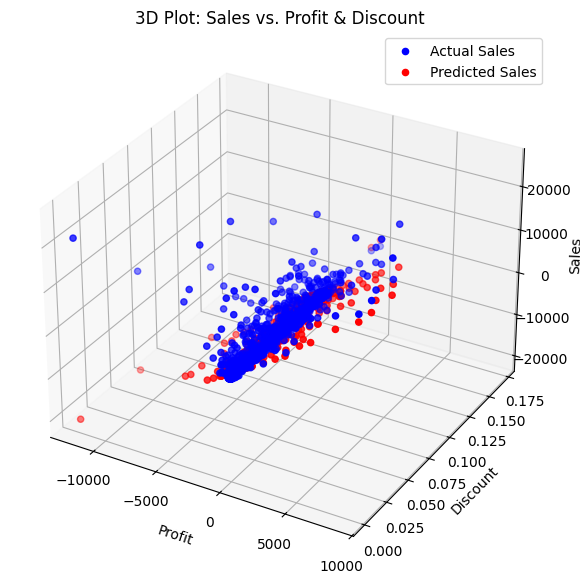

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test["Profit"], X_test["Discount"], y_test, color='blue', label="Actual Sales")
ax.scatter(X_test["Profit"], X_test["Discount"], y_pred, color='red', label="Predicted Sales")

ax.set_xlabel("Profit")
ax.set_ylabel("Discount")
ax.set_zlabel("Sales")
ax.set_title("3D Plot: Sales vs. Profit & Discount")
ax.legend()
plt.show()

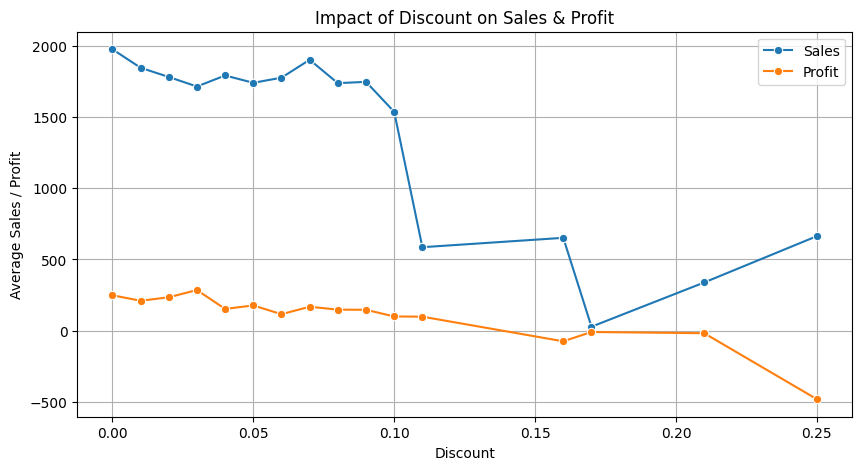

In [ ]:
# Group by Discount levels and calculate average Sales & Profit
discount_analysis = df.groupby("Discount")[["Sales", "Profit"]].mean().reset_index()

# Plot Sales and Profit vs. Discount
plt.figure(figsize=(10, 5))
sns.lineplot(x=discount_analysis["Discount"], y=discount_analysis["Sales"], label="Sales", marker="o")
sns.lineplot(x=discount_analysis["Discount"], y=discount_analysis["Profit"], label="Profit", marker="o")

plt.title("Impact of Discount on Sales & Profit")
plt.xlabel("Discount")
plt.ylabel("Average Sales / Profit")
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-13-a26bfe54ba35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_r")


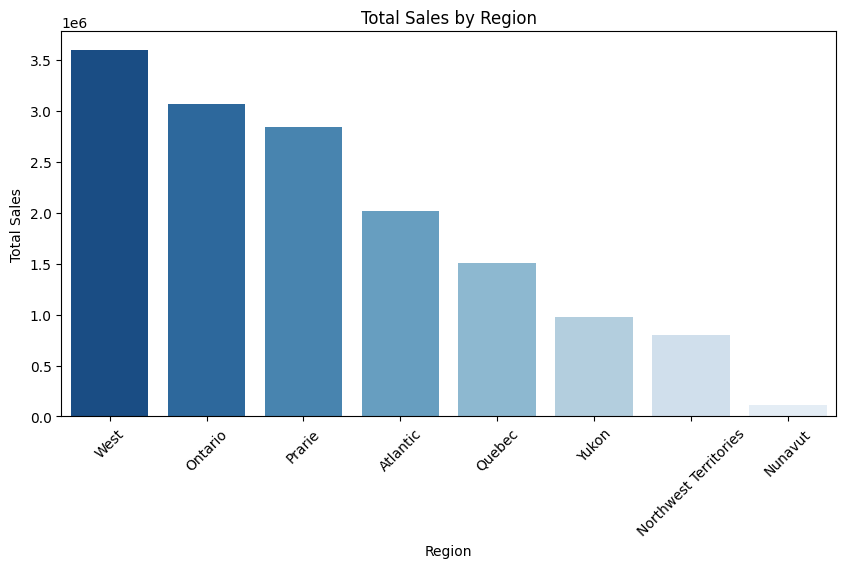

In [ ]:
# Group by Region and sum Sales
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Bar plot for Sales by Region
plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_r")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-a8ea32090d50>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


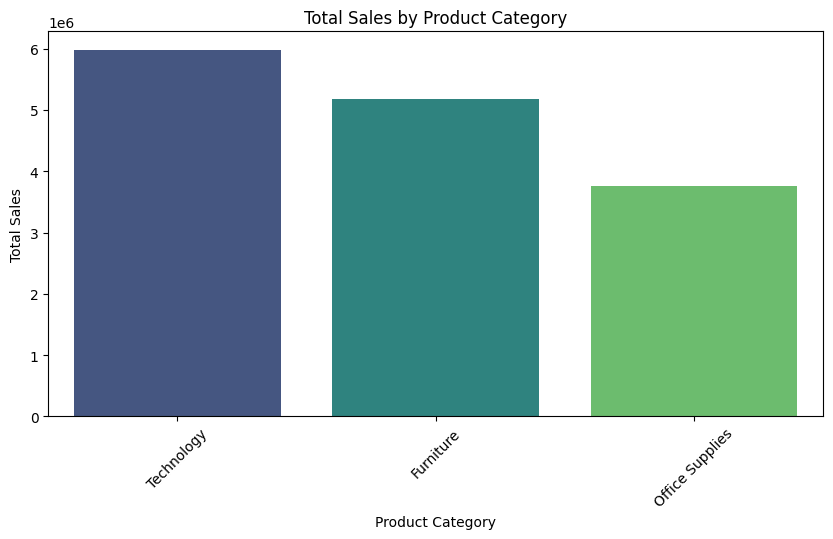

In [ ]:
# Group by Product Category and sum Sales
category_sales = df.groupby("Product Category")["Sales"].sum().sort_values(ascending=False)

# Bar plot for Sales by Product Category
plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-a1fc98074f47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_sales.index, y=segment_sales.values, palette="coolwarm")


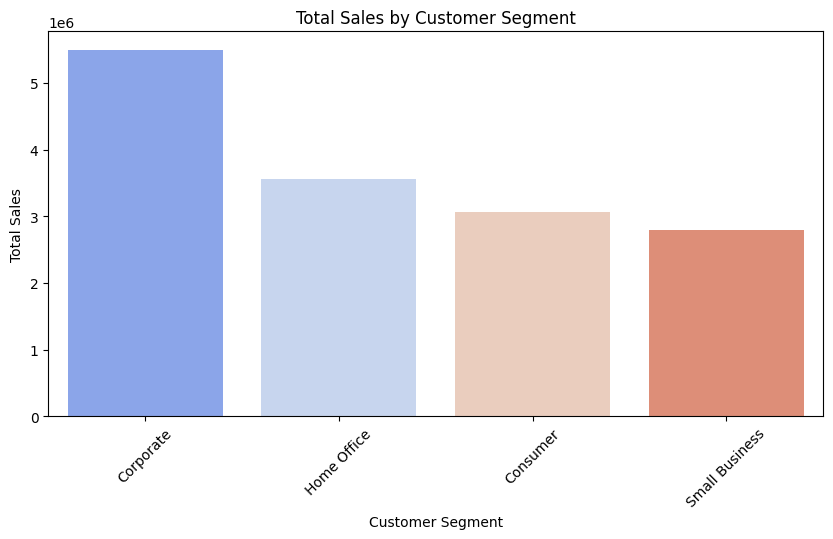

In [ ]:
# Group by Customer Segment and sum Sales
segment_sales = df.groupby("Customer Segment")["Sales"].sum().sort_values(ascending=False)

# Bar plot for Sales by Customer Segment
plt.figure(figsize=(10, 5))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette="coolwarm")
plt.title("Total Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()